Jacob Valdenegro Monzón A01640992

# Ejercicio 1

Evalúa con validación cruzada un modelo perceptrón multicapa para las variables que se te asignaron para este ejercicio.

In [7]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Cargar los datos del archivo CSV
file_path = 'crime_data.csv'
data = pd.read_csv(file_path)

# Seleccionar las variables independientes (M, W, S, P) y la variable dependiente (VR)
X = data[['M', 'W', 'S', 'P']].values
y = data['VR'].values

# Inicializar el modelo de perceptrón multicapa
regr = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=10000)
regr.fit(X, y)


# Validación cruzada con 5 particiones
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_total = 0
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regr_cv = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=50000)
    regr_cv.fit(X_train, y_train)

    # Fase de prueba
    y_pred = regr_cv.predict(X_test)

    # Calcular el MSE para esta partición
    mse_i = mean_squared_error(y_test, y_pred)
    print('MSE para la partición =', mse_i)

    mse_total += mse_i

# Calcular el MSE promedio
mse_promedio = mse_total / n_splits
print('MSE promedio =', mse_promedio)


MSE para la partición = 85714.22888808699
MSE para la partición = 34516.37832914064
MSE para la partición = 29476.511279097478
MSE para la partición = 23571.41440831344
MSE para la partición = 241856.0099186133
MSE promedio = 83026.90856465037


Modelo lineal para comparar

In [5]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión lineal
linear_model = LinearRegression()

# Validación cruzada con 5 particiones
mse_total = 0
for train_index, test_index in kf.split(X):
    # Fase de entrenamiento
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    linear_model.fit(X_train, y_train)

    # Fase de prueba
    y_pred = linear_model.predict(X_test)

    # Calcular el MSE para esta partición
    mse_i = mean_squared_error(y_test, y_pred)
    print('MSE para la partición =', mse_i)

    mse_total += mse_i

# Calcular el MSE promedio
mse_promedio = mse_total / n_splits
print('MSE promedio =', mse_promedio)


MSE para la partición = 92041.03165122482
MSE para la partición = 35176.79850892572
MSE para la partición = 18691.958815683258
MSE para la partición = 19212.511910884925
MSE para la partición = 104282.76695160466
MSE promedio = 53881.01356766468


**¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?**

No porque se muestra una variabilidad alta en sus MSE, hay un amplio rango lo que indica que no es preciso en sus predicciones.

**¿Qué modelo es mejor para los datos de criminalidad, el lineal o el .perceptrón multicapa? ¿Por qué?**

Al hacer lla comparacion entre los 2 modelos, en las variables que me tocaron el modelo lineal fue superior ya que muestra un MSE mas bajo.


# Ejercicio 2

Evalúa un modelo perceptrón multicapa con validación cruzada utilizando al menos 5 capas de 20 neuronas.

In [10]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import  StratifiedKFold
from sklearn.metrics import accuracy_score

# Cargar los datos
data = np.loadtxt("M_5.txt")

# Separar las características y la variable objetivo
X = data[:, 2:]
y = data[:, 0]

# Definir el modelo de Perceptrón Multicapa
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=1000, random_state=42)

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lista para almacenar las precisiones de cada fold
fold_accuracies = []

# Ciclo para la validación cruzada
for train_index, test_index in cv.split(X, y):
    # Separar los datos en entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entrenar el modelo
    mlp.fit(X_train, y_train)
    
    # Predecir con el modelo
    y_pred = mlp.predict(X_test)
    
    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

# Convertir a porcentaje las precisiones y calcular la media y desviación estándar
fold_accuracies = np.array(fold_accuracies) * 100
mean_accuracy = fold_accuracies.mean()
std_accuracy = fold_accuracies.std()

# Imprimir los resultados
print("Precisión promedio: %.2f%%" % mean_accuracy)
print("Desviación estándar: %.2f%%" % std_accuracy)


Precisión promedio: 88.56%
Desviación estándar: 3.52%


Evalúa un modelo perceptrón multicapa con validación cruzada, pero encontrando el número óptimo de capas y neuronas de la red.

In [4]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Cargar los datos
data = np.loadtxt("M_5.txt")

# Separar las características y la variable objetivo
X = data[:, 2:]
y = data[:, 0]

# Definir los posibles valores para el número de capas y neuronas
param_grid = {
    'hidden_layer_sizes': [(20,), (40,), (60,), (20, 20), (40, 40), (60, 60), (20, 20, 20), (40, 40, 40), (60, 60, 60)],
    'max_iter': [1000]
}

# Definir el modelo de Perceptrón Multicapa
mlp = MLPClassifier(random_state=42)

# Definir la validación cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Realizar la búsqueda en la cuadrícula con validación cruzada
grid_search = GridSearchCV(mlp, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros y la precisión correspondiente
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Precisión obtenida con los mejores hiperparámetros: %.2f%%" % (grid_search.best_score_ * 100))


Mejores hiperparámetros encontrados:
{'hidden_layer_sizes': (60,), 'max_iter': 1000}
Precisión obtenida con los mejores hiperparámetros: 90.62%


Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [2]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Cargar los datos
data = np.loadtxt("M_5.txt")

# Separar las características y la variable objetivo
X = data[:, 2:]
y = data[:, 0]

# Definir los hiperparámetros óptimos encontrados
best_params = {'hidden_layer_sizes': (60,), 'max_iter': 1000}

# Crear y ajustar el modelo con los hiperparámetros óptimos
mlp_optimal = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], 
                            max_iter=best_params['max_iter'], 
                            random_state=42)

# Ajustar el modelo a todos los datos
mlp_optimal.fit(X, y)

# Predecir sobre los mismos datos para evaluar el modelo
y_pred = mlp_optimal.predict(X)

# Calcular la precisión del modelo
accuracy = accuracy_score(y, y_pred)

# Mostrar los resultados
print("Modelo Perceptrón Multicapa ajustado con los hiperparámetros óptimos:")
print(f"Hiperparámetros: {best_params}")
print(f"Precisión en el conjunto de datos completo: {accuracy * 100:.2f}%")


Modelo Perceptrón Multicapa ajustado con los hiperparámetros óptimos:
Hiperparámetros: {'hidden_layer_sizes': (60,), 'max_iter': 1000}
Precisión en el conjunto de datos completo: 98.73%


**¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

Si se observan mejoras significativas al optimizar el tamaño de la red, al utilizar una red de 5 capas de 20 neuronas se obtuvo una precisión promedio de 88.56%, y optimizandolo se alcanzo una precisión de 90.62%. Este resultado era esperado ya que al ajustar los hiperparametros el modelo puede capturar mejor la complejidad del problema.

**¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?**

Los inconvenientes podrian ser en terminos de tiempo y recursos computacionales, tambien el modelo puede volverse mas complejo.

# Ejercicio 3

Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico, y evalúalo con validación cruzada. Para esta caso, es necesario que encuentres la gráfica de Época Vs Exactitud.

Época	Exactitud Promedio
1	0.0754
2	0.0879
3	0.0955
4	0.0980
5	0.0995
6	0.1030
7	0.1035
8	0.1045
9	0.1055
10	0.1055
11	0.1050
12	0.1050
13	0.1050
14	0.1055
15	0.1050
16	0.1050
17	0.1055
18	0.1050
19	0.1050
20	0.1050
21	0.1055
22	0.1055
23	0.1055
24	0.1050
25	0.1055
26	0.1060
27	0.1055
28	0.1055
29	0.1055
30	0.1060
31	0.1055
32	0.1055
33	0.1055
34	0.1055
35	0.1055
36	0.1060
37	0.1055
38	0.1060
39	0.1060
40	0.1060
41	0.1060
42	0.1060
43	0.1060
44	0.1060
45	0.1060
46	0.1060
47	0.1060
48	0.1060
49	0.1060
50	0.1060
51	0.1060
52	0.1060
53	0.1060
54	0.1060
55	0.1060
56	0.1060
57	0.1070
58	0.1065
59	0.1065
60	0.1070
61	0.1070
62	0.1065
63	0.1065
64	0.1065
65	0.1070
66	0.1070
67	0.1065
68	0.1070
69	0.1070
70	0.1070
71	0.1070
72	0.1070
73	0.1070
74	0.1070
75	0.1070
76	0.1070
77	0.1070
78	0.1070
79	0.1070
80	0.1070
81	0.1070
82	0.1070
83	0.1070
84	0.1070
85	0.1070
86	0.1070
87	0.1070
88	0.1070
89	0.1070
90	0.1070
91	0.1070
92	0.1070
93	0.1070
94	0.1070
95	0.1070
96	0.1070
97	0.1070
98	0.1070
99	0

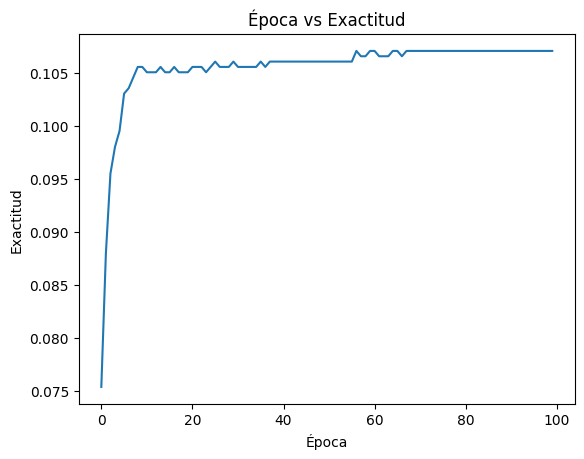

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Cargar los datos
data = np.loadtxt('P1_2.txt')
X = data[:, 2:]
y = data[:, 0]

# Normalizar los datos
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Parámetros del modelo
learning_rate = 0.01
n_epochs = 100

# Inicializar variables para almacenar resultados
accuracies = []

# Validación cruzada estratificada
kf = StratifiedKFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Inicializar pesos
    weights = np.zeros(X_train.shape[1])
    bias = 0

    # Entrenamiento con descenso de gradiente estocástico
    accuracy_per_epoch = []
    for epoch in range(n_epochs):
        for i in range(X_train.shape[0]):
            linear_output = np.dot(X_train[i], weights) + bias
            y_predicted = 1 if linear_output > 0 else 0

            # Actualización de pesos y bias
            error = y_train[i] - y_predicted
            weights += learning_rate * error * X_train[i]
            bias += learning_rate * error

        # Evaluar el modelo en el conjunto de prueba
        y_test_pred = np.dot(X_test, weights) + bias
        y_test_pred = np.where(y_test_pred > 0, 1, 0)
        accuracy = np.mean(y_test_pred == y_test)
        accuracy_per_epoch.append(accuracy)
    
    accuracies.append(accuracy_per_epoch)

# Calcular el promedio de las exactitudes a lo largo de las épocas
mean_accuracies = np.mean(accuracies, axis=0)

# Imprimir datos de exactitud promedio
print("Época\tExactitud Promedio")
for epoch in range(n_epochs):
    print(f"{epoch + 1}\t{mean_accuracies[epoch]:.4f}")

# Graficar Época vs Exactitud
plt.plot(range(n_epochs), mean_accuracies)
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.title('Época vs Exactitud')
plt.show()


Repite el paso anterior, pero utilizando descenso de gradiente de lote y de mini-lote para entrenar el modelo.

Época	Exactitud Promedio
1	0.1226
2	0.1055
3	0.1080
4	0.1090
5	0.1095
6	0.1090
7	0.1090
8	0.1090
9	0.1085
10	0.1085
11	0.1080
12	0.1080
13	0.1080
14	0.1080
15	0.1080
16	0.1080
17	0.1080
18	0.1080
19	0.1080
20	0.1080
21	0.1080
22	0.1080
23	0.1080
24	0.1080
25	0.1085
26	0.1080
27	0.1080
28	0.1080
29	0.1080
30	0.1080
31	0.1080
32	0.1080
33	0.1080
34	0.1080
35	0.1080
36	0.1080
37	0.1080
38	0.1080
39	0.1080
40	0.1080
41	0.1080
42	0.1080
43	0.1080
44	0.1080
45	0.1080
46	0.1085
47	0.1085
48	0.1085
49	0.1080
50	0.1085
51	0.1085
52	0.1085
53	0.1080
54	0.1085
55	0.1080
56	0.1080
57	0.1080
58	0.1085
59	0.1085
60	0.1085
61	0.1085
62	0.1080
63	0.1085
64	0.1085
65	0.1085
66	0.1085
67	0.1085
68	0.1085
69	0.1085
70	0.1085
71	0.1085
72	0.1085
73	0.1085
74	0.1085
75	0.1085
76	0.1085
77	0.1085
78	0.1085
79	0.1085
80	0.1085
81	0.1085
82	0.1085
83	0.1085
84	0.1085
85	0.1085
86	0.1085
87	0.1085
88	0.1085
89	0.1085
90	0.1085
91	0.1085
92	0.1085
93	0.1085
94	0.1085
95	0.1085
96	0.1085
97	0.1085
98	0.1085
99	0

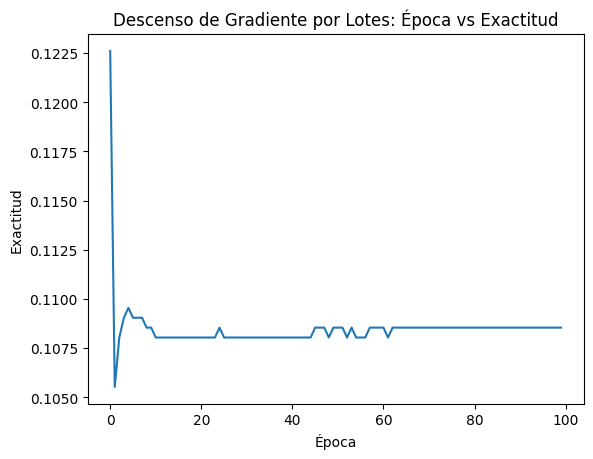

In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Cargar los datos
data = np.loadtxt('P1_2.txt')
X = data[:, 2:]
y = data[:, 0]

# Normalizar los datos
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Parámetros del modelo
learning_rate = 0.01
n_epochs = 100

# Inicializar variables para almacenar resultados
accuracies = []

# Validación cruzada estratificada
kf = StratifiedKFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Inicializar pesos
    weights = np.zeros(X_train.shape[1])
    bias = 0

    # Entrenamiento con descenso de gradiente por lotes
    accuracy_per_epoch = []
    for epoch in range(n_epochs):
        linear_output = np.dot(X_train, weights) + bias
        y_predicted = np.where(linear_output > 0, 1, 0)

        # Actualización de pesos y bias
        error = y_train - y_predicted
        weights += learning_rate * np.dot(error, X_train) / X_train.shape[0]
        bias += learning_rate * error.mean()

        # Evaluar el modelo en el conjunto de prueba
        y_test_pred = np.dot(X_test, weights) + bias
        y_test_pred = np.where(y_test_pred > 0, 1, 0)
        accuracy = np.mean(y_test_pred == y_test)
        accuracy_per_epoch.append(accuracy)
    
    accuracies.append(accuracy_per_epoch)

# Calcular el promedio de las exactitudes a lo largo de las épocas
mean_accuracies = np.mean(accuracies, axis=0)

# Imprimir datos de exactitud promedio
print("Época\tExactitud Promedio")
for epoch in range(n_epochs):
    print(f"{epoch + 1}\t{mean_accuracies[epoch]:.4f}")

# Graficar Época vs Exactitud
plt.plot(range(n_epochs), mean_accuracies)
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.title('Descenso de Gradiente por Lotes: Época vs Exactitud')
plt.show()


Época	Exactitud Promedio
1	0.0794
2	0.0889
3	0.0960
4	0.1000
5	0.1020
6	0.1040
7	0.1040
8	0.1050
9	0.1060
10	0.1060
11	0.1065
12	0.1065
13	0.1065
14	0.1065
15	0.1065
16	0.1065
17	0.1065
18	0.1065
19	0.1065
20	0.1065
21	0.1065
22	0.1065
23	0.1065
24	0.1065
25	0.1065
26	0.1065
27	0.1070
28	0.1070
29	0.1070
30	0.1070
31	0.1070
32	0.1070
33	0.1070
34	0.1070
35	0.1070
36	0.1070
37	0.1070
38	0.1070
39	0.1070
40	0.1070
41	0.1070
42	0.1070
43	0.1070
44	0.1070
45	0.1075
46	0.1075
47	0.1075
48	0.1070
49	0.1070
50	0.1075
51	0.1075
52	0.1075
53	0.1075
54	0.1075
55	0.1075
56	0.1075
57	0.1075
58	0.1075
59	0.1075
60	0.1075
61	0.1075
62	0.1075
63	0.1075
64	0.1075
65	0.1075
66	0.1075
67	0.1075
68	0.1075
69	0.1075
70	0.1075
71	0.1075
72	0.1075
73	0.1075
74	0.1075
75	0.1075
76	0.1075
77	0.1075
78	0.1075
79	0.1075
80	0.1075
81	0.1075
82	0.1075
83	0.1075
84	0.1075
85	0.1075
86	0.1075
87	0.1075
88	0.1075
89	0.1075
90	0.1075
91	0.1075
92	0.1075
93	0.1075
94	0.1075
95	0.1075
96	0.1075
97	0.1075
98	0.1075
99	0

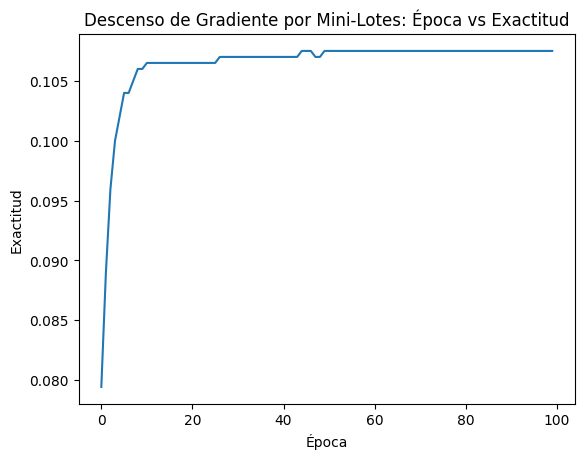

In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Cargar los datos
data = np.loadtxt('P1_2.txt')
X = data[:, 2:]
y = data[:, 0]

# Normalizar los datos
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Parámetros del modelo
learning_rate = 0.01
n_epochs = 100
batch_size = 32  # Tamaño del mini-lote

# Inicializar variables para almacenar resultados
accuracies = []

# Validación cruzada estratificada
kf = StratifiedKFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Inicializar pesos
    weights = np.zeros(X_train.shape[1])
    bias = 0

    # Entrenamiento con descenso de gradiente por mini-lotes
    accuracy_per_epoch = []
    for epoch in range(n_epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            linear_output = np.dot(X_batch, weights) + bias
            y_predicted = np.where(linear_output > 0, 1, 0)

            # Actualización de pesos y bias
            error = y_batch - y_predicted
            weights += learning_rate * np.dot(error, X_batch) / X_batch.shape[0]
            bias += learning_rate * error.mean()

        # Evaluar el modelo en el conjunto de prueba
        y_test_pred = np.dot(X_test, weights) + bias
        y_test_pred = np.where(y_test_pred > 0, 1, 0)
        accuracy = np.mean(y_test_pred == y_test)
        accuracy_per_epoch.append(accuracy)
    
    accuracies.append(accuracy_per_epoch)

# Calcular el promedio de las exactitudes a lo largo de las épocas
mean_accuracies = np.mean(accuracies, axis=0)

# Imprimir datos de exactitud promedio
print("Época\tExactitud Promedio")
for epoch in range(n_epochs):
    print(f"{epoch + 1}\t{mean_accuracies[epoch]:.4f}")

# Graficar Época vs Exactitud
plt.plot(range(n_epochs), mean_accuracies)
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.title('Descenso de Gradiente por Mini-Lotes: Época vs Exactitud')
plt.show()


Evalúa un modelo perceptrón multicapa con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch.
Utilice Keras

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Cargar los datos
data = np.loadtxt('P1_2.txt')
X = data[:, 2:]
y = data[:, 0]

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Configuración del modelo
def create_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Definir la forma de la entrada
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Parámetros de validación cruzada
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Variables para almacenar resultados
accuracies = []

# Validación cruzada
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convertir etiquetas a formato binario (0 o 1)
    y_train_bin = np.where(y_train == 1, 1, 0)
    y_test_bin = np.where(y_test == 1, 1, 0)

    # Crear y entrenar el modelo
    model = create_model(X_train.shape[1])
    model.fit(X_train, y_train_bin, epochs=100, batch_size=32, verbose=0, validation_split=0.1)

    # Evaluar el modelo en el conjunto de prueba
    y_pred = model.predict(X_test).flatten()
    y_pred_bin = np.where(y_pred > 0.5, 1, 0)
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    accuracies.append(accuracy)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Precisión promedio en validación cruzada: {mean_accuracy:.4f}')
print(f'Desviación estándar de la precisión: {std_accuracy:.4f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Precisión promedio en validación cruzada: 0.9055
Desviación estándar de la precisión: 0.0150


**¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?**

El modelo de una neurona no es suficiente y que me dio promedios de exactitud muy bajos a comparacion del perceptron multicapa, el cual tuvo un aumento en la precision ya que este es capaz de capturar las relaciones no lineales presentes en los datos.